# Barents 2.5 ocean model

### About the product

<img src="image_barents_2_5.png"
     style="float: left; margin-right: 30px;" 
    width="350"/>


[Barents-2.5](https://ocean.met.no/models#barents) is a ROMS-CICE (*METROMS*) model run by the Norwegian Meteorological institute.

[Röhrs et al (2023)](https://gmd.copernicus.org/articles/16/5401/2023/) describes the model. 







The model domain is centered on the Barents Sea including Svalbard, but extends to northern Scandinavia, Novaya Zemlya, the Greenland shelf in the  Fram Strait and the Lomonosov ridge in the Eurasian basin:

<img src="domain_barents_2_5.png"
    width="200"/>

### About the data

#### Model

- 2.5 km spatial resolution and 42 ocean layers.
- 7 ice layers + 1 snow layer; 5 sea ice categories.
- Assimilates observed sea ice concentration, SST, and in-situ hydrography. 

Details of the model configuration are available [here](https://zenodo.org/records/7607191).
#### Forcing

- Ocean and sea ice boundary conditions from TOPAZ v4.
- Climatological runoff for Svalbard.
- River runoff data for mainland Norway from daily estimates from the Norwegian Water Resources and Energy Directorate.
  Atmospheric forcing from the Integrated Forecast System (IFS) at European Centre for Medium Weather Forecasts.


#### Access

- The files (v2.0) are opendap served here: https://thredds.met.no/thredds/fou-hi/barents_eps.html
- Daily files, but there is also an aggregated file (19381 time points..).
- Bunch of nice output variables: ``u, v, w, wind, St, T, SIC, SIT, ice_u, ice_v, zeta, mixing``
- Everything gridded to common **xyz grid** and available at **hourly resolution**.

#### Versions

- Version 1 covers 2020-06-11-> 2022-11-21.
- Version 2 covers 2022-06-29 to present (and a week or so into the future).

____

## Load the dataset

Lazy loading of aggregated, z-gridded data.

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [6]:
url_b25_agg_v1 = 'https://thredds.met.no/thredds/dodsC/barents25km_agg' # V1.0 (2020-> 2022)
url_b25_agg_v2 = 'https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_zdepth_be' # V2.0 (2022->)

In [7]:
ds_v1 = xr.open_dataset(url_b25_agg_v1)
ds_v2 = xr.open_dataset(url_b25_agg_v2)

____

### *Example:* Plot ocean temperature at 100 m depth

##### Choose a depth level we want to examine 

In [8]:
depth_level = 100

##### Make subsets of the files with only this depth level

In [9]:
ds_singledepth_v1 = ds_v1.sel(depth = depth_level, method = 'nearest')
ds_singledepth_v2 = ds_v2.sel(depth = depth_level, method = 'nearest')

**Plot ocean temperature** at `depth_level` (show the first time step of ds_v2)

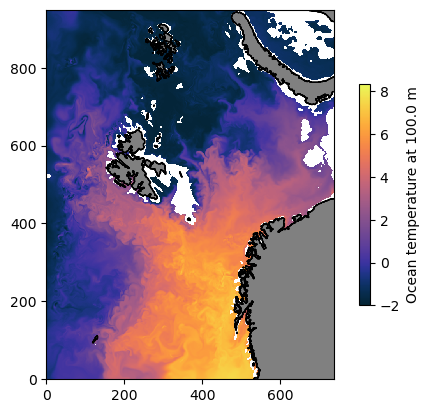

In [48]:
fig, ax = plt.subplots(); ax.set_aspect('equal')
C = ax.pcolormesh(ds_singledepth_v2.temperature.isel(time = 0), cmap = cmocean.cm.thermal)
ax.contourf(ds_v2.sea_mask, levels = [0, 0.5, 10], colors = ['gray', 'none'])
ax.contour(ds_v2.sea_mask, colors = ['k',], linewidths = 0.7)
plt.colorbar(C, shrink = 0.6,
             label = f'Ocean temperature at {float(ds_singledepth_v2.depth)} m')